In [ ]:
Varying the Classification Threshold in Logistic Regression

In [1]:
import pandas as pd

data_web_address = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
column_names = ['pregnancy_x', 
                'plasma_con', 
                'blood_pressure', 
                'skin_mm', 
                'insulin', 
                'bmi', 
                'pedigree_func', 
                'age', 
                'target']

feature_names = column_names[:-1]
all_data = pd.read_csv(data_web_address , names=column_names)
all_data.head()

import numpy as np
import pandas as pd

X = all_data[feature_names]
y = all_data['target']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7,stratify=y)

In [2]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

In [3]:
y_pred_proba = lr.predict_proba(X_test)

In [4]:
y_pred_proba

array([[ 0.87110309,  0.12889691],
       [ 0.83996356,  0.16003644],
       [ 0.81821721,  0.18178279],
       [ 0.73973464,  0.26026536],
       [ 0.80392034,  0.19607966],
       [ 0.97661331,  0.02338669],
       [ 0.91417761,  0.08582239],
       [ 0.69095568,  0.30904432],
       [ 0.84737969,  0.15262031],
       [ 0.42467393,  0.57532607],
       [ 0.80527656,  0.19472344],
       [ 0.4549751 ,  0.5450249 ],
       [ 0.76046297,  0.23953703],
       [ 0.78354755,  0.21645245],
       [ 0.26617998,  0.73382002],
       [ 0.92885146,  0.07114854],
       [ 0.48230915,  0.51769085],
       [ 0.7643201 ,  0.2356799 ],
       [ 0.72843522,  0.27156478],
       [ 0.97183494,  0.02816506],
       [ 0.38376215,  0.61623785],
       [ 0.37861048,  0.62138952],
       [ 0.6990594 ,  0.3009406 ],
       [ 0.63859007,  0.36140993],
       [ 0.26278893,  0.73721107],
       [ 0.68879542,  0.31120458],
       [ 0.69872131,  0.30127869],
       [ 0.9045281 ,  0.0954719 ],
       [ 0.82250969,

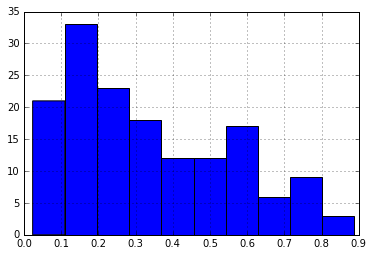

In [7]:
%matplotlib inline
pd.Series(y_pred_proba[:,1]).hist()

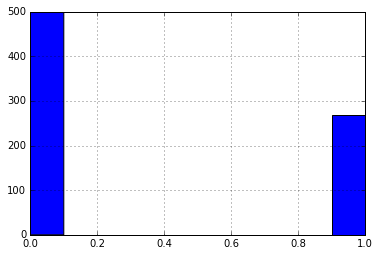

In [8]:
all_data['target'].hist()

In [9]:
from sklearn.preprocessing import binarize

y_pred_default = binarize(y_pred_proba, threshold=0.5)
y_pred_default

array([[ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,

In [10]:
y_pred_default[:,1]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,
        0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,
        0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
        0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
        0.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,
        0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,
        0.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,
        0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,
        0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.])

In [12]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_default[:,1],labels = [1,0])

array([[27, 27],
       [12, 88]], dtype=int64)

In [13]:
y_pred_low = binarize(y_pred_proba, threshold=0.2)
confusion_matrix(y_test, y_pred_low[:,1],labels=[1,0]) #positive class is 1 again

array([[50,  4],
       [48, 52]], dtype=int64)

In [17]:
from __future__ import division 
def npv_func(th):
    y_pred_low = binarize(y_pred_proba, threshold=th)

    second_column = confusion_matrix(y_test, y_pred_low[:,1],labels=[1,0])[:,1]
    npv = second_column[1]/second_column.sum()
    return npv

npv_func(0.2)

0.9285714285714286

C:\Users\jdavila\Anaconda27\lib\site-packages\ipykernel\__main__.py:6: RuntimeWarning: invalid value encountered in longlong_scalars


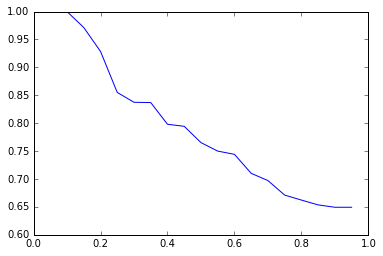

In [18]:
import matplotlib.pyplot as plt
ths = np.arange(0,1,0.05)

npvs = []
for th in np.arange(0,1.00,0.05):
    npvs.append(npv_func(th)) 
    
plt.plot(ths,npvs)